# Importing essential libraries

In [1]:
# Data manipulation libraries
import numpy as np 
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
df = pd.read_csv('hotel_bookings 2.csv')

# Exploratory Data Analysis & Data Cleaning

In [3]:
# Checking the first five columns
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
# Checking the last five columns
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [5]:
# Checking the shape of the data
df.shape

(119390, 32)

In [6]:
# Fetching the column names
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# Checking the not null value counts for each column and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Inference: Most of the data types seems to be correct. Let's convert 'reservation_status_date' from object to datetime as it is one of the most important columns for our analysis.

In [8]:
# Converting reservation_status_date to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format="mixed")

In [9]:
# Making sure the change went through as planned
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [10]:
# Checking number of unique values for each categorical column
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
# Printing out all the unique values of the each categorical column
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('='*70)

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [12]:
# Total missing values in the data
df.isnull().sum().sum()

129425

In [13]:
# Column wise missing values
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [14]:
# Percentage of missing values in each column
((df.isnull().sum()/ len(df))*100).sort_values(ascending=False)

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

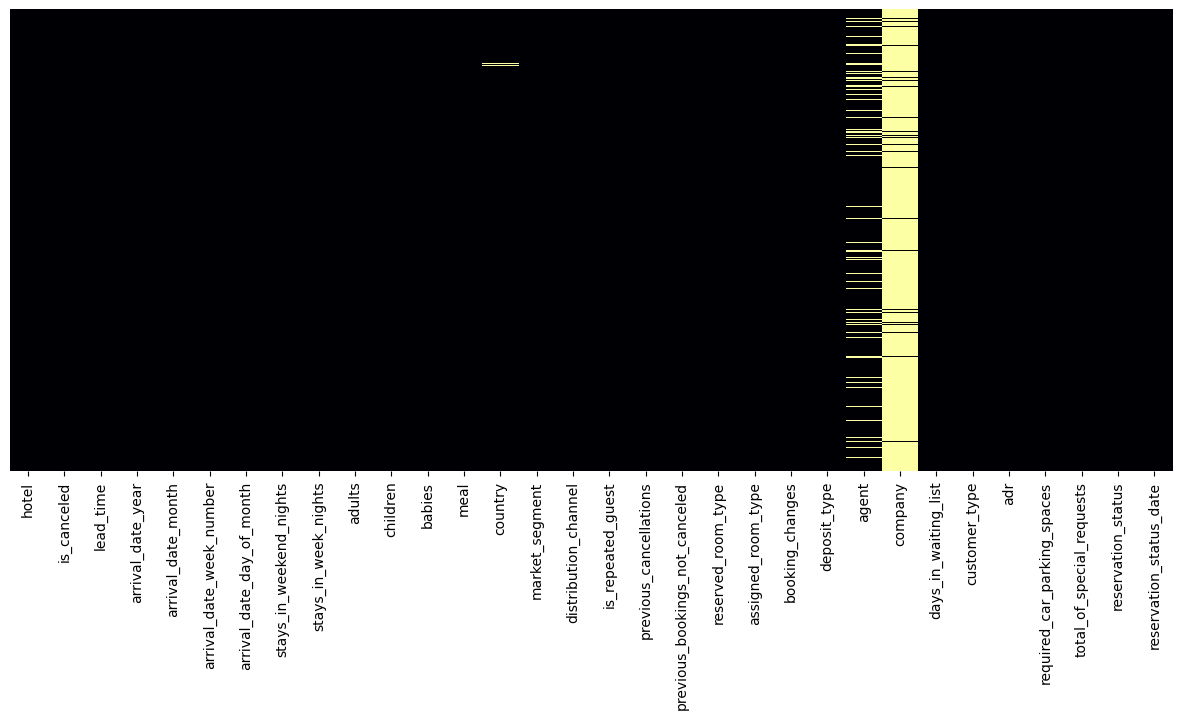

In [15]:
# Plotting missing values in a heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='inferno')
plt.show()

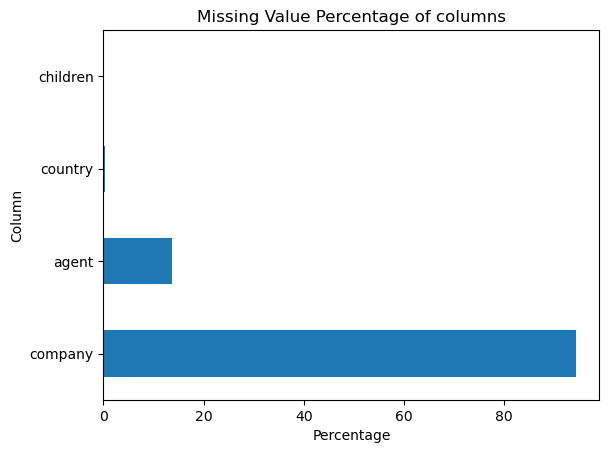

In [16]:
# Lets concentrate on columns with missing values, plot them on a apporipate chart for comparison

missing_val = ((df.isnull().sum()/ len(df))*100).sort_values(ascending=False)

missing_val[missing_val>0].plot(kind='barh', xlabel='Percentage', ylabel='Column',
                                title='Missing Value Percentage of columns')
plt.show()

Inference: Company column has the most null values (94.3%) followed by agent column 13.6%. On the other hand columns like country and children has only a handful of null values 488 and 4 respectively.
Since Company column is mostly null values imputing it will be kinda hectic and agent column won't be as useful in my analysis so I'll droping these two. For the country and children column since their null value counts are negligilble compared to our total data points, I'll be simply dropping those rows.

In [17]:
# Dropping company and agent column
df.drop(columns=['company', 'agent'], inplace=True)

In [18]:
# Dropping rows with null values
df.dropna(inplace=True)

In [19]:
# Checking if we were able to get rid of all the null values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

🌟 Milestone Achieved! 🌟
Our dataset just had a refreshing cleanse — goodbye, null values! ✨👋

In [20]:
# Checking for duplicate values
df.duplicated().all()

False

In [21]:
# Checking numerical columns' summary statistics
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-31 20:49:36.695991552
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-05 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-16 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-12-09 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


Inference: As we can see there are sigficant number of outliers in our data. As for example we can take adr (average daily rate) column where minimum value is around -6 and maximum value is around 5400. Even though most of these columns won't be of much use in our analysis it would still be better to remove/reduce the outliers nonetheless.

In [22]:
# Calculating IQR
numeric_df = df.select_dtypes(include=['number'])

q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)
iqr = q3-q1

In [23]:
# Removing outliers using IQR method
cleaned_df = df[~((numeric_df < (q1 - 1.5 * iqr)) | 
                 (numeric_df > (q3 + 1.5 * iqr))).any(axis=1)]

In [24]:
# Now lets check the summary statistics again to make sure the outlier removal was successful
cleaned_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,55020.000000,55020.000000,55020.000000,55020.000000,55020.000000,55020.000000,55020.000000,55020.0,55020.0,55020.0,55020.0,55020.0,55020.0,55020.0,55020.0,55020.000000,55020.0,55020.000000,55020
mean,0.396129,97.147455,2016.197728,26.616903,15.702599,0.920829,2.399346,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.530434,0.0,0.539713,2016-08-14 17:52:16.750272768
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,2014-11-18 00:00:00
25%,0.000000,25.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.800000,0.0,0.000000,2016-02-26 00:00:00
50%,0.000000,72.000000,2016.000000,26.000000,16.000000,1.000000,2.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.500000,0.0,0.000000,2016-08-18 00:00:00
75%,1.000000,150.000000,2017.000000,37.000000,24.000000,2.000000,3.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.800000,0.0,1.000000,2017-02-18 00:00:00
max,1.000000,373.000000,2017.000000,53.000000,31.000000,4.000000,6.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210.000000,0.0,2.000000,2017-12-08 00:00:00
std,0.489096,87.649487,0.695397,13.386523,8.864765,0.876590,1.417869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.350505,0.0,0.685848,NaN


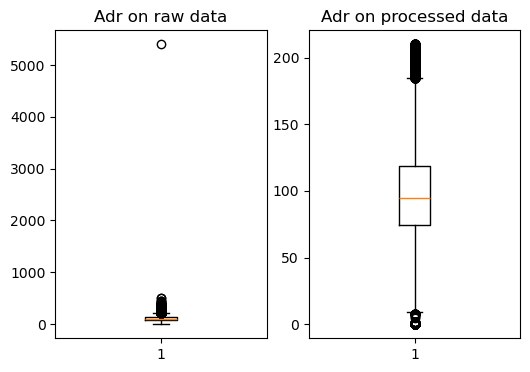

In [25]:
# Plotting boxplot of average daily rate (ADR) before and after processing
fig, ax = plt.subplots(1, 2, figsize=(6,4))

ax[0].boxplot(df['adr'])
ax[0].set_title('Adr on raw data')


ax[1].boxplot(cleaned_df['adr'])
ax[1].set_title('Adr on processed data')
plt.show()

Inference: Since I used ADR as an example earlier, I decided to plot the same column in box plot before after outlier processing. As we can clearly see from the above figure the changes are significant and it will reflect to the whole dataset.

# Analysis & Visualization

In [26]:
# Checking the cancellation percentage
cleaned_df['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.603871
1    0.396129
Name: proportion, dtype: float64

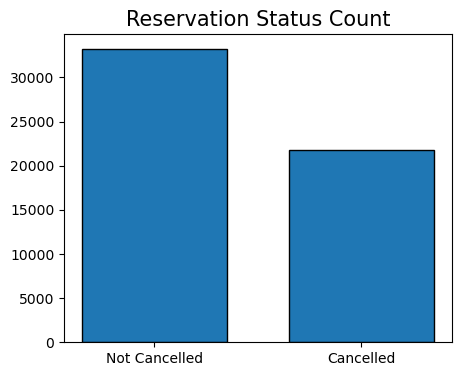

In [27]:
# Plotting it as a bar graph
plt.figure(figsize=(5,4))
plt.title('Reservation Status Count', fontsize=15)
plt.bar(['Not Cancelled', 'Cancelled'], cleaned_df['is_canceled'].value_counts(), 
        width=0.7, edgecolor='k')
plt.show()

Inference: As we can see from the plot as well as the percentage calculated above, the cancellation rates are way too high. 5-10% is manageable however having cancellation rate around 40% can be really devastating in long run.

In [28]:
# Checking reservation status in different hotel types
print('Count')
print(cleaned_df.groupby('hotel')['is_canceled'].value_counts())
print('='*40)
print('Percentage')
cleaned_df.groupby('hotel')['is_canceled'].value_counts(normalize=True)

Count
hotel         is_canceled
City Hotel    0              22599
              1              16077
Resort Hotel  0              10626
              1               5718
Name: count, dtype: int64
Percentage


hotel         is_canceled
City Hotel    0              0.584316
              1              0.415684
Resort Hotel  0              0.650147
              1              0.349853
Name: proportion, dtype: float64

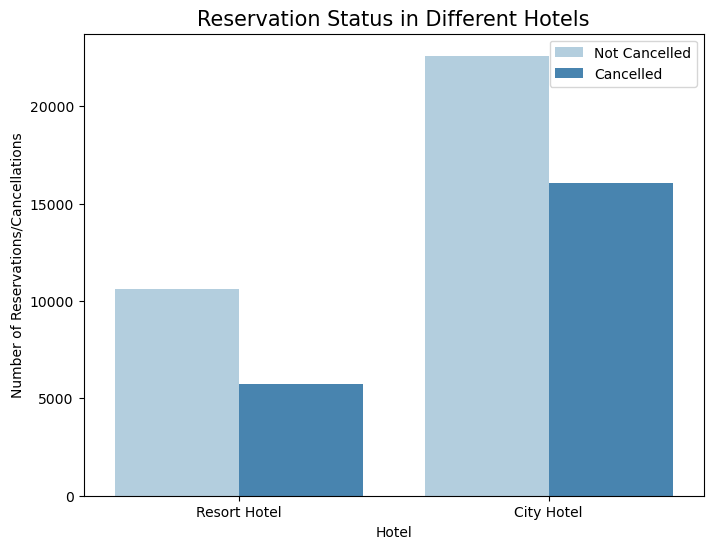

In [29]:
# Plotting reservation status in different hotel types
plt.figure(figsize=(8,6))
sns.countplot(data=cleaned_df, x='hotel', hue=cleaned_df['is_canceled'].astype(str), palette='Blues')
plt.title('Reservation Status in Different Hotels', fontsize=15)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations/Cancellations')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

Inference: As we can see from above visualization and calculation, City hotel shows higher rate of cancellations compared to Resort hotel. Let's dig deeper and try to find out what could be the possible reasons for the same.

In [30]:
# Creating separate dataframes for Resort hotel and City hotel for the ease of further analysis
resort_hotel = cleaned_df[cleaned_df['hotel'] == 'Resort Hotel']
city_hotel = cleaned_df[cleaned_df['hotel'] == 'City Hotel']

In [31]:
# Lets check if average daily rate plays any role in cancellation or not
# Calculating mean of average daily price of resort and city hotel
resort_adr_mean = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_adr_mean = city_hotel.groupby('reservation_status_date')[['adr']].mean()

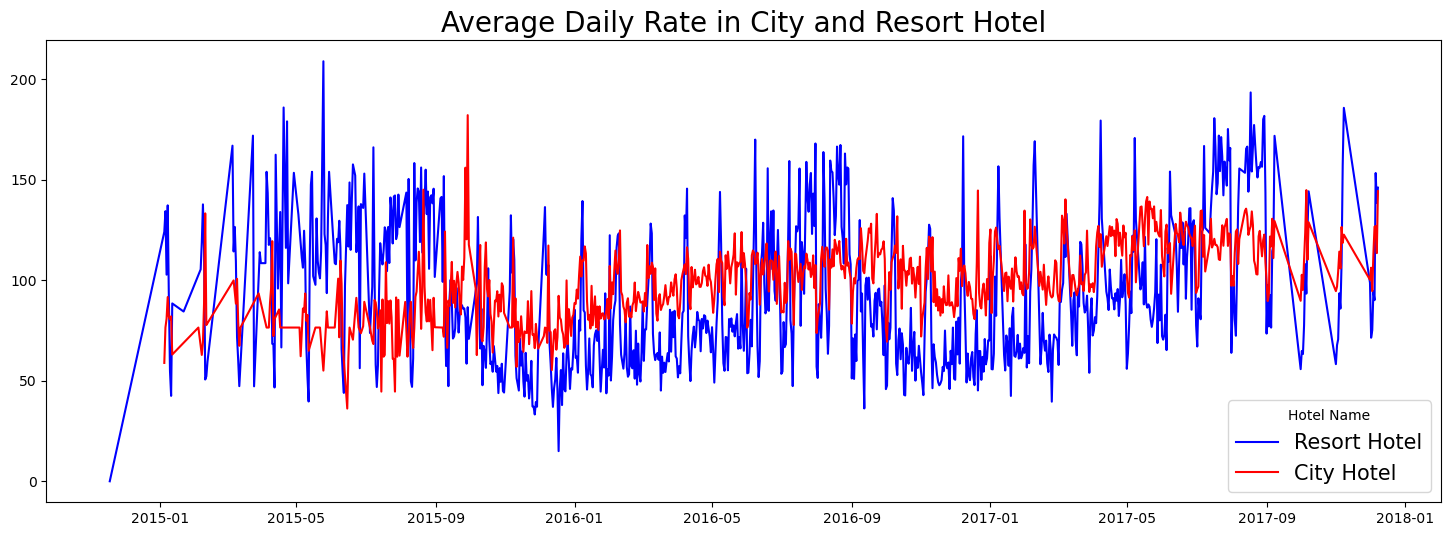

In [51]:
# Plotting line chart to see the average daily rate trend in resort and city hotel
plt.figure(figsize=(18,6))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=20)
plt.plot(resort_adr_mean.index, resort_adr_mean['adr'], label='Resort Hotel', color='blue')
plt.plot(city_adr_mean.index, city_adr_mean['adr'], label='City Hotel', color='red')
plt.legend(fontsize=15, title='Hotel Name')
plt.show()

In [33]:
# Creating Month column in the cleaned data
cleaned_df['month'] = cleaned_df['reservation_status_date'].dt.month

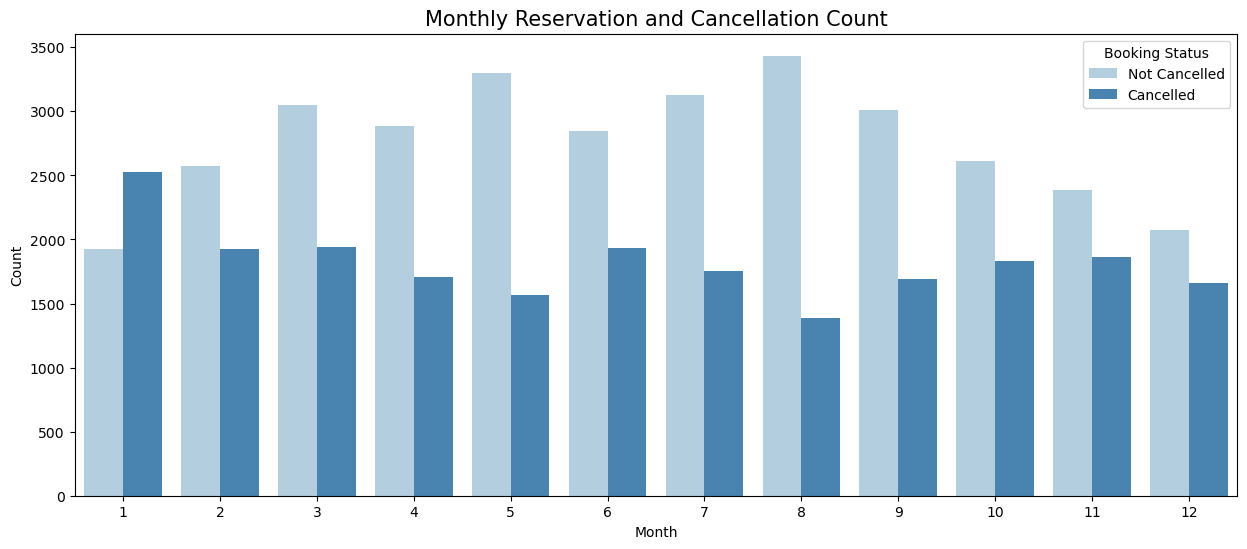

In [34]:
# Checking monthly reservation and cancellation rate
plt.figure(figsize=(15,6))
sns.countplot(data=cleaned_df, x=cleaned_df['month'], hue=df['is_canceled'].astype(str), 
              palette='Blues')
plt.title('Monthly Reservation and Cancellation Count', size=15)
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(['Not Cancelled', 'Cancelled'], title='Booking Status')
plt.show()

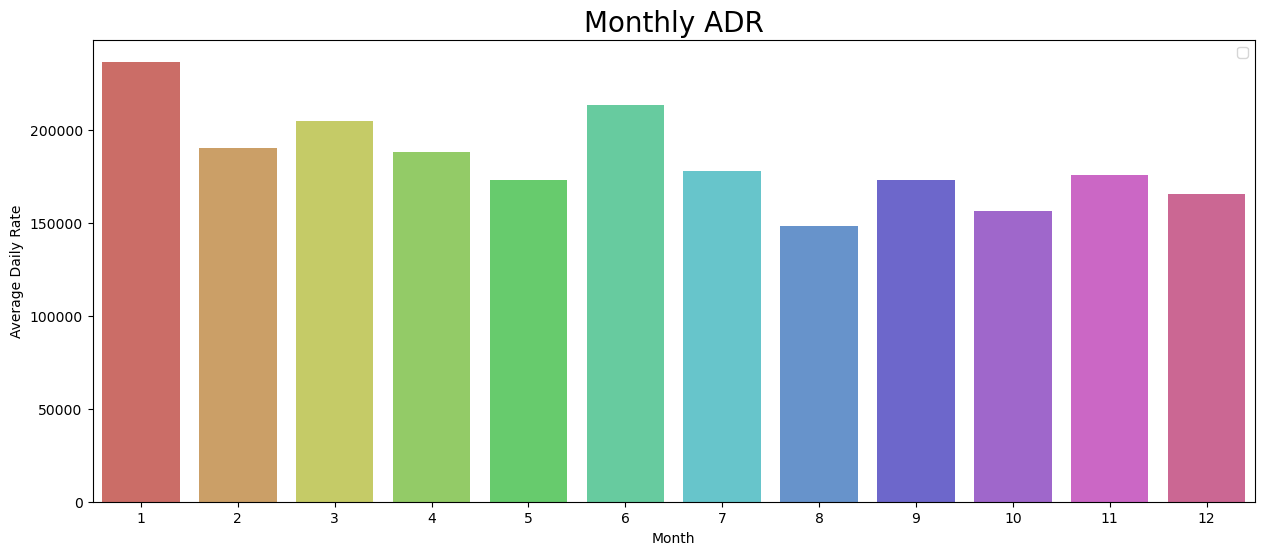

In [35]:
# Checking monthly price effect on cancellations 
plt.figure(figsize=(15,6))
sns.barplot(x='month', y='adr', data= cleaned_df[cleaned_df['is_canceled']==1]\
                                        .groupby('month')['adr'].sum().reset_index(), palette='hls')
plt.title('Monthly ADR', size=20)
plt.ylabel('Average Daily Rate')
plt.xlabel('Month')
plt.legend('')
plt.show()

Inference: As we have predicted earlier, price has a significant correlation with cancellation. We can see from the above plots as the average daily rate increases so is the cancellation rate. January has the highest cancellation rate as well as price and in the month of August cancellation rate was the lowest so is the price.

In [36]:
# Lets check cancellation rate in different countries
# Creating a df with cancelled booking record only
cancelled_df = cleaned_df[cleaned_df['is_canceled']==1]

# Finding out top 5 countries on the basis of their cancellations
top_5_countries = cancelled_df['country'].value_counts()[:5]

In [37]:
top_5_countries

country
PRT    12232
GBR     1452
ESP     1208
FRA     1176
ITA      867
Name: count, dtype: int64

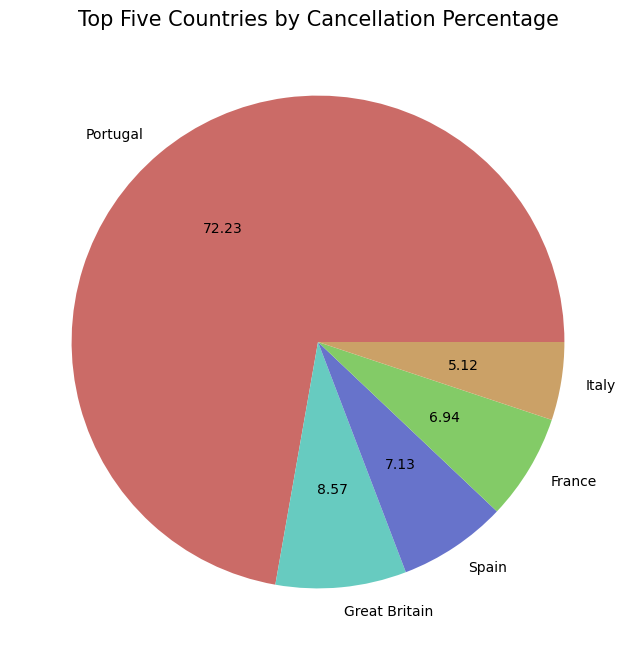

In [38]:
# Let's plot the above countries in a pie chart to get a better look
plt.figure(figsize=(8,8))
hls_colors = ['#cb6b67', '#67cbc0', '#6773cb', '#83cb67', '#cba167']
labels = ['Portugal', 'Great Britain', 'Spain', 'France', 'Italy']
plt.pie(top_5_countries, labels=labels, autopct='%.2f', colors=hls_colors)
plt.title('Top Five Countries by Cancellation Percentage', size=15)
plt.show()

Inference: As per the cancellaltion rate goes Portugal, Great Britain, Spain, France, Italy shows the highest contribution. Portugal being top on the list with a massive 72% contribution among these five countries.

In [39]:
# Now let's check how each channel/market segement is performing
print('Count\n')
print(cleaned_df['market_segment'].value_counts(),'\n')
print('='*30,'\n')
print('Percentage\n')
print(cleaned_df['market_segment'].value_counts(normalize=True))

Count

market_segment
Online TA        29592
Offline TA/TO    11863
Groups            8450
Direct            4342
Corporate          610
Complementary      162
Aviation             1
Name: count, dtype: int64 


Percentage

market_segment
Online TA        0.537841
Offline TA/TO    0.215613
Groups           0.153581
Direct           0.078917
Corporate        0.011087
Complementary    0.002944
Aviation         0.000018
Name: proportion, dtype: float64


In [40]:
# Lets see the same statistics for bookings that got cancelled
print('Count\n')
print(cancelled_df['market_segment'].value_counts(),'\n')
print('='*30,'\n')
print('Percentage\n')
print(cancelled_df['market_segment'].value_counts(normalize=True))

Count

market_segment
Online TA        11761
Groups            5412
Offline TA/TO     3583
Direct             826
Corporate          184
Complementary       29
Name: count, dtype: int64 


Percentage

market_segment
Online TA        0.539619
Groups           0.248314
Offline TA/TO    0.164396
Direct           0.037899
Corporate        0.008442
Complementary    0.001331
Name: proportion, dtype: float64


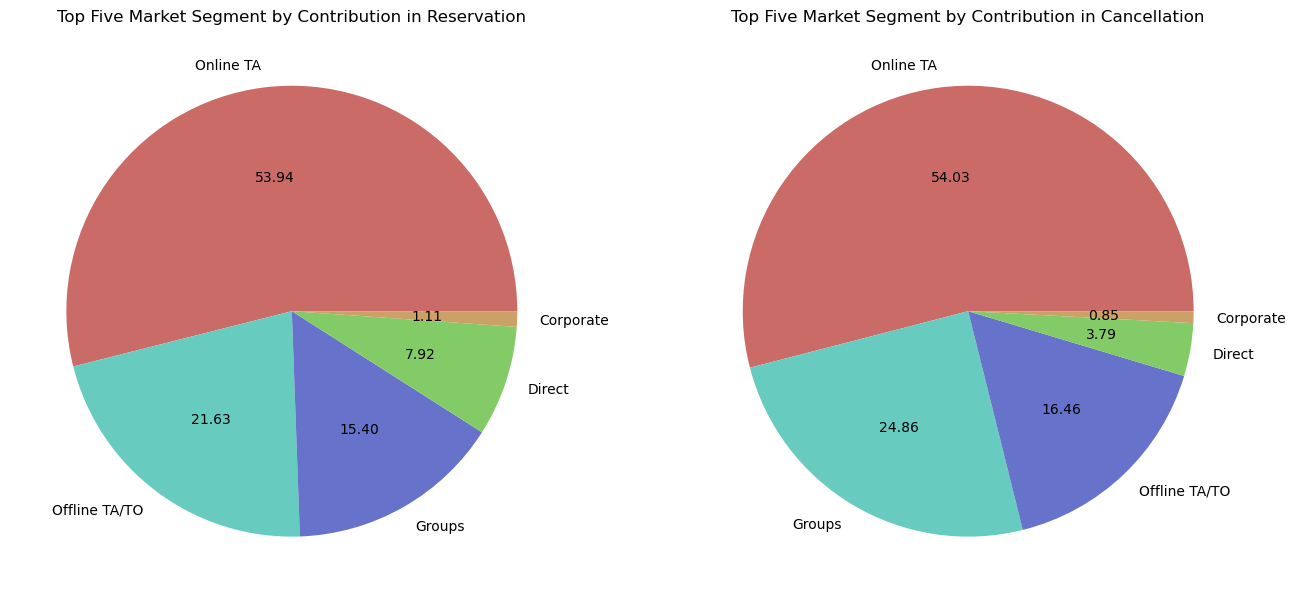

In [54]:
# Plotting Top 5 market segments by contribution in reservation and cancellation
hls_colors = ['#cb6b67', '#67cbc0', '#6773cb', '#83cb67', '#cba167']
labels_1 = cleaned_df['market_segment'].value_counts()[:5].index
labels_2 = cancelled_df['market_segment'].value_counts()[:5].index
# Reservation pie chart
fig, ax = plt.subplots(1, 2, figsize=(16,10))
ax[0].pie(cleaned_df['market_segment'].value_counts()[:5], autopct='%.2f', \
        labels=labels_1, colors=hls_colors)
ax[0].set_title('Top Five Market Segment by Contribution in Reservation')
# Cancellation Pie Chart
ax[1].pie(cancelled_df['market_segment'].value_counts()[:5], autopct='%.2f', \
        labels=labels_2, colors=hls_colors)
ax[1].set_title('Top Five Market Segment by Contribution in Cancellation')
plt.show()

Inference: In both reservation and cancellation Online Travel Agents shows the highest contribution. Remaining channels/market segements are also same however order is different in terms of contribution.

In [42]:
# Creating a dataframe for not cancelled records only for the ease of further analysis
not_cancelled_df = cleaned_df[cleaned_df['is_canceled']==0]

In [43]:
# Calcultaing daily average adr for cancelled and and not cancelled dataframe
avg_adr_cancelled = cancelled_df.groupby('reservation_status_date')['adr'].mean()\
                                .reset_index()

avg_adr_not_cancelled = not_cancelled_df.groupby('reservation_status_date')['adr'].mean()\
                                .reset_index()

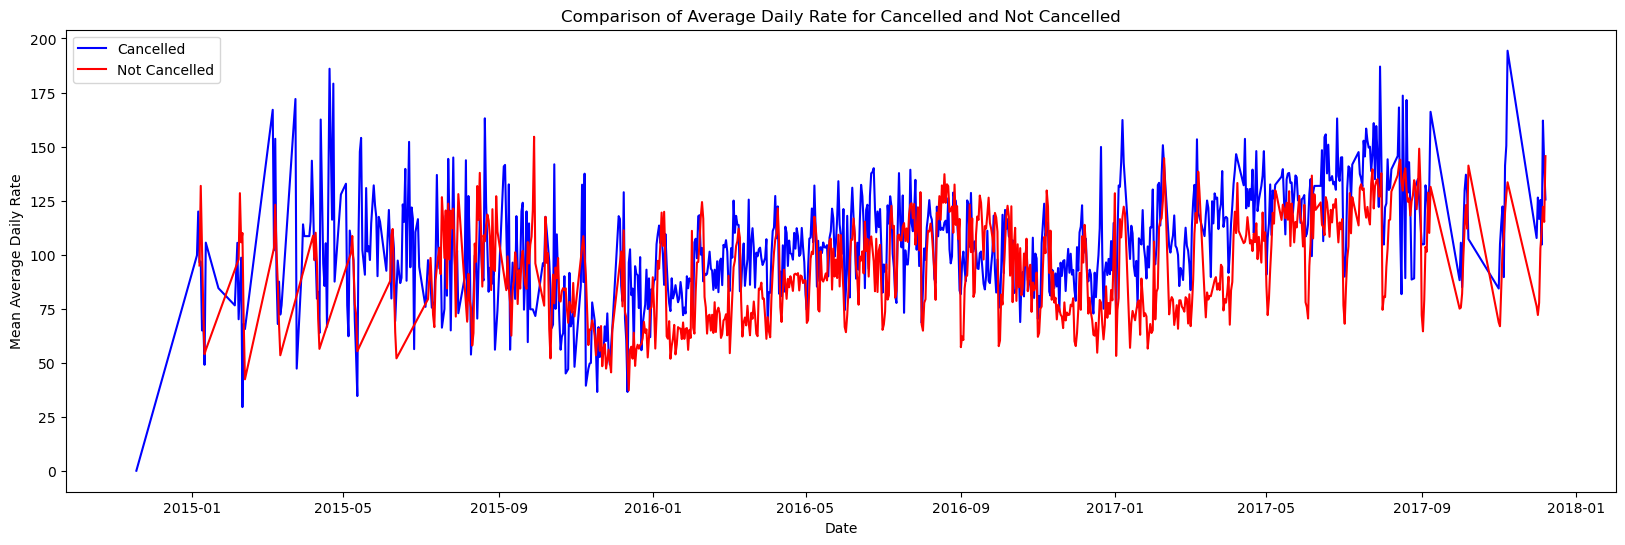

In [45]:
# Plotting Average daily rate trend for cancelled and not cancelled reservations
plt.figure(figsize=(20,6))
plt.plot(avg_adr_cancelled['reservation_status_date'], avg_adr_cancelled['adr'],
         color='blue')
plt.plot(avg_adr_not_cancelled['reservation_status_date'],
         avg_adr_not_cancelled['adr'], color='red')
plt.ylabel('Mean Average Daily Rate')
plt.xlabel('Date')
plt.title('Comparison of Average Daily Rate for Cancelled and Not Cancelled')
plt.legend(['Cancelled', 'Not Cancelled'])
plt.show()

In [46]:
# Since we have inconsistent data (less data) in 2015 and post 2017-09 lets take
# a subset of data between these two date range in order understand the relationship better
filtered_cancelled = avg_adr_cancelled[(avg_adr_cancelled['reservation_status_date']>='2016-01') &
                                      (avg_adr_cancelled['reservation_status_date']<='2017-09')]

filtered_not_cancelled = avg_adr_not_cancelled[(avg_adr_not_cancelled['reservation_status_date']>='2016-01') &
                                           (avg_adr_not_cancelled['reservation_status_date']<='2017-09')]

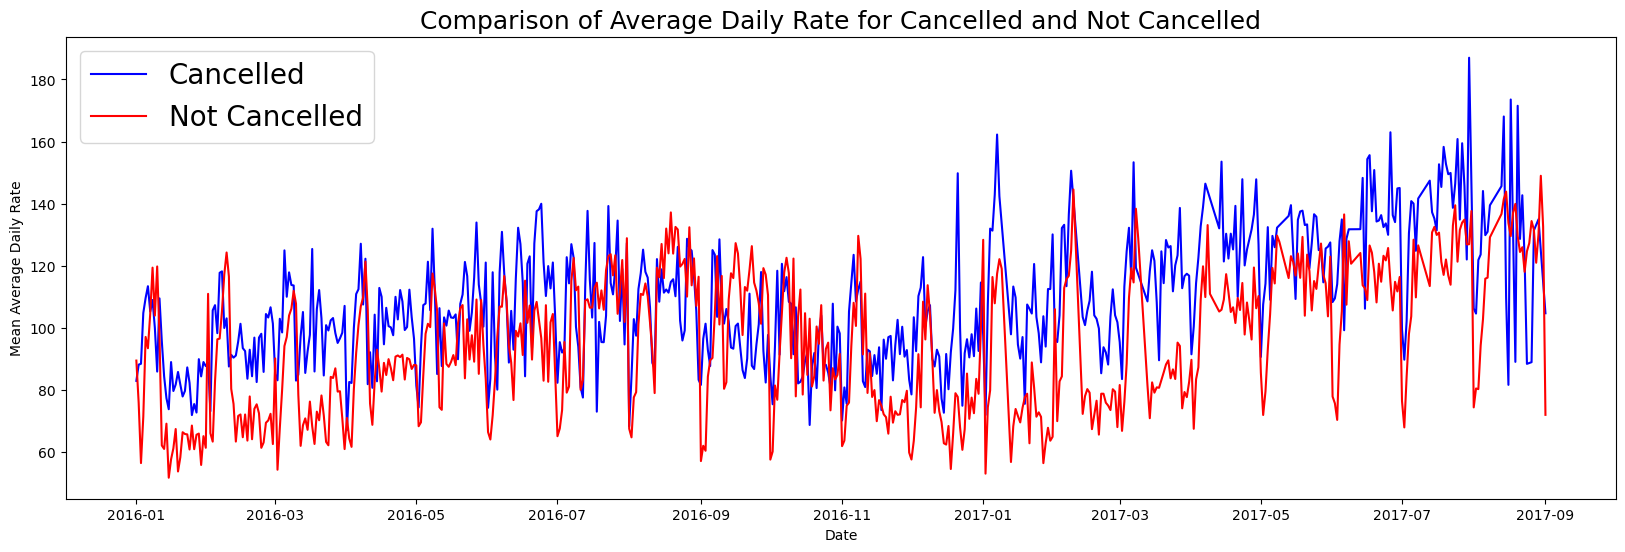

In [50]:
# Plotting the filtered data on a line chart again
plt.figure(figsize=(20,6))
plt.plot(filtered_cancelled['reservation_status_date'], filtered_cancelled['adr'],
         color='blue')
plt.plot(filtered_not_cancelled['reservation_status_date'],
         filtered_not_cancelled['adr'], color='red')
plt.ylabel('Mean Average Daily Rate')
plt.xlabel('Date')
plt.title('Comparison of Average Daily Rate for Cancelled and Not Cancelled', size=18)
plt.legend(['Cancelled', 'Not Cancelled'], fontsize=20)
plt.show()

Inference: Above chart further solidifies our assumption, as we can clearly see reservations that got cancelled had higher average daily rate in most of the cases.